In [1]:
#Create a series with 10 elements containing both positive and negative integers
import pandas as panda
import numpy as num_py

sample_list = [1, 2, -6, 3, 2, -1, -7, 1, -5, -2]
series = panda.Series(sample_list)
print(series)

0    1
1    2
2   -6
3    3
4    2
5   -1
6   -7
7    1
8   -5
9   -2
dtype: int64


In [3]:
# Examine the series with the head() method
series_head = series.head()
print(series_head)

0    1
1    2
2   -6
3    3
4    2
dtype: int64


In [9]:
# Create a new series from the originally created series with only negative numbers
i = 0
negative_series = []
for number in series:
    if number < 0:
        negative_series.insert(i, number)
        i+=1
negative_series = panda.Series(negative_series)
print(negative_series)

# Create the original series with both positive and negative numbers


# Create a new series with only the negative numbers from the original series



0   -6
1   -1
2   -7
3   -5
4   -2
dtype: int64


In [10]:
# Press shift-enter to execute a Jupyter notebook cell
# Import the Python Libraries used in the tutorial
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [15]:
# Read a csv file into Pandas Dataframe
salary_dataframe = panda.read_csv('C:/Users/israt/OneDrive/Desktop/usn/semester2/data_science/file/Salaries.csv')

# Display the first 10 records
print(salary_dataframe.iloc[:10])

        rank discipline  phd  service   sex  salary
0       Prof          B   56       49  Male  186960
1       Prof          A   12        6  Male   93000
2       Prof          A   23       20  Male  110515
3       Prof          A   40       31  Male  131205
4       Prof          B   20       18  Male  104800
5       Prof          A   20       20  Male  122400
6  AssocProf          A   20       17  Male   81285
7       Prof          A   18       18  Male  126300
8       Prof          A   29       19  Male   94350
9       Prof          A   51       51  Male   57800


# Exercise - Working with a single column

In [16]:
# Calculate the descriptive statistics for only the salary column in df_new
df_new = salary_dataframe['salary'].describe()
print(df_new)


count        78.000000
mean     108023.782051
std       28293.661022
min       57800.000000
25%       88612.500000
50%      104671.000000
75%      126774.750000
max      186960.000000
Name: salary, dtype: float64


In [17]:
# Get a count for each of the values in the salary_k column in df_new
df_new['salary_k'] = salary_dataframe.groupby('salary')['salary'].count()
print(df_new['salary_k'])

salary
57800     1
62884     1
63100     1
71065     1
72500     2
         ..
155750    1
155865    1
161101    1
162200    1
186960    1
Name: salary, Length: 73, dtype: int64


In [19]:
# Calculate the average (mean) salary_k in df_new
df_new['salary_k'].mean()


1.0684931506849316

# Exercise - Grouping data

In [24]:
# Group data by the rank and discipline and find the average yearsOfService and salary_k for each group.
rank_dataframe = salary_dataframe.groupby('rank')
salary_dataframe.groupby(['rank']).groupby(['discipline'])
for i, value in rank_dataframe:
    print(rank_dataframe.get_group(i))


AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

# Exercise - Filtering data

In [26]:
# Using filtering, find the mean value of the salary for the discipline A
salary_dataframe.loc[salary_dataframe['discipline'] == 'A', 'salary'].mean()


98331.11111111111

In [32]:
# Challenge:
# Determine how many female and male professors earned more than 100K
import numpy as num_py
# Filter for professors with salaries over 100K
new_salary_dataframe = salary_dataframe.query("salary > 100000")[['sex']]
# Group by gender and count the number of professors in each group
count = new_salary_dataframe.groupby(['sex'])['sex'].count()

# Print the results
print(count)

sex
Female    21
Male      25
Name: sex, dtype: int64


# Exercise - Slicing a dataframe

In [33]:
#Create a new dataframe where you filter out salaries below 100K from df_new
new_dataframe = salary_dataframe.loc[salary_dataframe['salary'] < 100000]
print(new_dataframe)

         rank discipline  phd  service     sex  salary
1        Prof          A   12        6    Male   93000
6   AssocProf          A   20       17    Male   81285
8        Prof          A   29       19    Male   94350
9        Prof          A   51       51    Male   57800
12   AsstProf          B    1        0    Male   88000
16   AsstProf          B    8        3    Male   75044
17   AsstProf          B    4        0    Male   92000
20   AsstProf          B    4        4    Male   92000
22   AsstProf          A    4        2    Male   73000
23   AsstProf          A    2        0    Male   85000
24       Prof          A   30       23    Male   91100
25       Prof          B   35       31    Male   99418
28   AsstProf          B    7        2    Male   91300
38   AsstProf          B    4        3    Male   91000
41  AssocProf          A   13        8  Female   74830
42   AsstProf          B    4        2  Female   80225
43   AsstProf          B    5        0  Female   77000
46   AsstP

In [35]:
# Extract rows 5:10 and columns ['service', 'salary'] of df_sub100 using the .loc method
df_sub100=new_salary_dataframe.loc[5:10, ['service', 'salary']]
print(df_sub100)

KeyError: "None of [Index(['service', 'salary'], dtype='object')] are in the [columns]"

In [36]:
# Extract rows 5:10 and columns ['yearsOfService', 'salary_k'] from df_sub100 using the iloc method
print(new_dataframe.loc[5:10])

        rank discipline  phd  service   sex  salary
6  AssocProf          A   20       17  Male   81285
8       Prof          A   29       19  Male   94350
9       Prof          A   51       51  Male   57800


In [38]:
# Extract rows with index values [6, 12, 20, 22] and columns ['yearsOfService','salary_k'] from df_sub100
df_indexed = new_dataframe.loc[[6, 12, 20, 22], ['service', 'salary']]
print(df_indexed)

    service  salary
6        17   81285
12        0   88000
20        4   92000
22        2   73000


# Exercise - Sorting

In [40]:
#Sort the data frame df_new by the salary (in descending order)
new_df = salary_dataframe.sort_values(by=['salary'], ascending = False)
print(new_df)

         rank discipline  phd  service     sex  salary
0        Prof          B   56       49    Male  186960
13       Prof          B   35       33    Male  162200
72       Prof          B   24       15  Female  161101
27       Prof          A   45       43    Male  155865
31       Prof          B   22       21    Male  155750
..        ...        ...  ...      ...     ...     ...
55   AsstProf          A    2        0  Female   72500
71  AssocProf          B   12        9  Female   71065
66   AsstProf          A    7        6  Female   63100
54  AssocProf          A   25       22  Female   62884
9        Prof          A   51       51    Male   57800

[78 rows x 6 columns]


In [41]:
#Display the first 10 records of the output
print(df_new.head(10))

count                                                    78.0
mean                                            108023.782051
std                                              28293.661022
min                                                   57800.0
25%                                                   88612.5
50%                                                  104671.0
75%                                                 126774.75
max                                                  186960.0
salary_k    salary
57800     1
62884     1
63100     1
710...
Name: salary, dtype: object


# Missing Values

In [128]:
# Press shift-enter to execute a Jupyter notebook cell
# Import the Python Libraries used in the tutorial
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [42]:
# Read a dataset with missing values
dataframe = pd.read_csv('C:/Users/israt/OneDrive/Desktop/usn/semester2/data_science/file/flights.csv')
print(dataframe)

        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
0       2013      1    1     517.0        2.0     830.0       11.0      UA   
1       2013      1    1     533.0        4.0     850.0       20.0      UA   
2       2013      1    1     542.0        2.0     923.0       33.0      AA   
3       2013      1    1     554.0       -6.0     812.0      -25.0      DL   
4       2013      1    1     554.0       -4.0     740.0       12.0      UA   
...      ...    ...  ...       ...        ...       ...        ...     ...   
160749  2013      9   30    2105.0       -1.0    2329.0      -25.0      UA   
160750  2013      9   30    2121.0       21.0    2349.0      -25.0      DL   
160751  2013      9   30    2140.0        0.0      10.0      -30.0      AA   
160752  2013      9   30    2149.0       -7.0    2245.0      -23.0      UA   
160753  2013      9   30    2233.0       80.0     112.0       42.0      UA   

       tailnum  flight origin dest  air_time  distance  hour  m

In [130]:
# Count how many missing pieces of data there are in the dep_delay and arr_delay columns
print(dataframe.isnull().sum())

year            0
month           0
day             0
dep_time     2336
dep_delay    2336
arr_time     2479
arr_delay    2827
carrier         0
tailnum      1433
flight          0
origin          0
dest            0
air_time     2827
distance        0
hour         2336
minute       2336
dtype: int64

In [43]:
print(dataframe.isnull().sum()[['dep_delay', 'arr_delay']])

dep_delay    2336
arr_delay    2827
dtype: int64


# Exercise 7 Graphing data

In [44]:
# Use the seaborn package to explore the dependency of arr_delay on dep_delay 
# in the flights dataset. You can use a scatterplot or regplot using flight.
import seaborn
import matplotlib.pyplot as plotter

In [45]:
# Show graphs within the Python notebook
%matplotlib inline

In [67]:
data = seaborn.load_dataset("flights")
dataframe = pd.DataFrame(data=data, columns=['arr_delay', 'dep_delay'])
seaborn.regplot(x='arr_delay', y='dep_delay', data=flights)
plotter.show(block = True)

NameError: name 'flights' is not defined

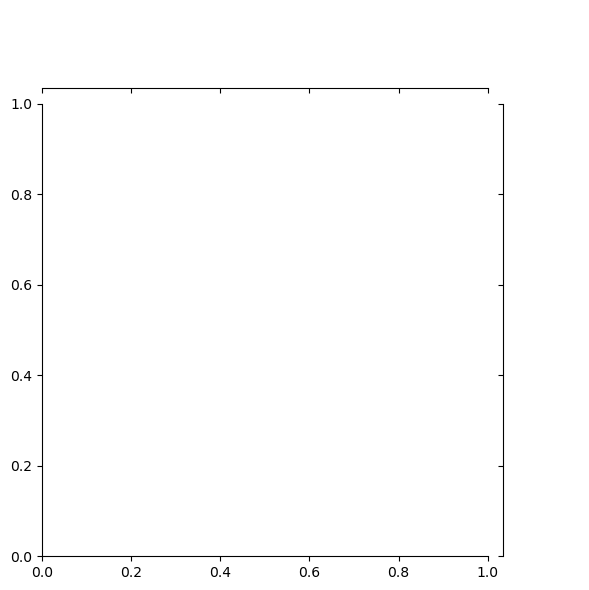

In [61]:
seaborn.jointplot(x='arr_delay', y='dep_delay', data=dataframe)